In [1]:
########################################################################
#01    Dataframes for graphing                                         #
#   a- create annual df up to 2019 for comparing full year data.       #
#   b- create various df's for graphing.                               # 
#   c- build df with first 5 months perchange data for last 6 years.   #
#   d- ecomm and comm df's with monthly percentage change.             #
########################################################################

#a
annual_10to19 = annual_df[annual_df["year"] < 2020]

#b
sales_15to20 = complete_df[((complete_df["year"] >= 2015) & (complete_df["year"] <= 2020)) &
                            (complete_df["dt_code"] == "SM") &  (complete_df["cat_code"] == "4541")]

perchange_15to20 = complete_df[((complete_df["year"] >= 2015) & (complete_df["year"] <= 2020)) &
                            (complete_df["dt_code"] == "MPCSM") &  (complete_df["cat_code"] == "4541")]

sales_19and20 = sales_15to20[(sales_15to20["year"] == 2019) | (sales_15to20["year"] == 2020)]

just_14 = sales_15to20[sales_15to20["year"] == 2014]
just_15 = sales_15to20[sales_15to20["year"] == 2015]
just_16 = sales_15to20[sales_15to20["year"] == 2016]
just_17 = sales_15to20[sales_15to20["year"] == 2017]
just_18 = sales_15to20[sales_15to20["year"] == 2018]
just_19 = sales_15to20[sales_15to20["year"] == 2019]
just_20 = sales_15to20[sales_15to20["year"] == 2020]


instore_1920 = complete_df[((complete_df["year"] >= 2019)) &
                         (complete_df["dt_code"] == "SM") &  (complete_df["cat_code"] == "44W72")]

just_14.reset_index(inplace=True,drop=True)
just_15.reset_index(inplace=True,drop=True)
just_16.reset_index(inplace=True,drop=True)
just_17.reset_index(inplace=True,drop=True)
just_18.reset_index(inplace=True,drop=True)
just_19.reset_index(inplace=True,drop=True)
just_20.reset_index(inplace=True,drop=True)
instore_1920.reset_index(inplace=True,drop=True)
sales_19and20.reset_index(inplace=True,drop=True)
sales_15to20.reset_index(inplace=True,drop=True)
annual_10to19.reset_index(inplace=True,drop=True)

perchange_total = complete_df[(complete_df["dt_code"] == "MPCSM") &  (complete_df["cat_code"] == "4541")]
perchange_total.reset_index(inplace=True,drop=True)

first5x_perchange = perchange_15to20[(perchange_15to20["month"] == "Jan") | (perchange_15to20["month"] == "Feb") |
                                    (perchange_15to20["month"] == "Mar") | (perchange_15to20["month"] == "Apr") |
                                    (perchange_15to20["month"] == "May")]
first5x_perchange.reset_index(inplace=True,drop=True)

#C
first5_perchange = perchange_15to20[(perchange_15to20["month"] == "Jan") | (perchange_15to20["month"] == "Feb") |
                                    (perchange_15to20["month"] == "Mar") | (perchange_15to20["month"] == "Apr") |
                                    (perchange_15to20["month"] == "May")]
first5_perchange.reset_index(inplace=True,drop=True)

first5_Jan = first5_perchange[first5_perchange["month"] == "Jan"]
first5_Feb = first5_perchange[first5_perchange["month"] == "Feb"]
first5_Mar = first5_perchange[first5_perchange["month"] == "Mar"]
first5_Apr = first5_perchange[first5_perchange["month"] == "Apr"]
first5_May = first5_perchange[first5_perchange["month"] == "May"]
first5_Jan.reset_index(inplace=True,drop=True)
first5_Feb.reset_index(inplace=True,drop=True)
first5_Mar.reset_index(inplace=True,drop=True)
first5_Apr.reset_index(inplace=True,drop=True)
first5_May.reset_index(inplace=True,drop=True)

years = ("2015", "2016", "2017", "2018", "2019", "2020")
first5_delta = pd.DataFrame({"year": years, "Jan": first5_Jan["amount"], "Feb": first5_Feb["amount"],
                            "Mar": first5_Mar["amount"], "Apr": first5_Apr["amount"], "May": first5_May["amount"]})
first5_delta.to_csv("Data/monthlyperchange_1520_JanMay.csv",index=False,header=True)
#e
ecomm_perchange = complete_df[(complete_df["dt_code"] == "MPCSM") & (complete_df["cat_code"] == "4541")]
ecomm_perchange.reset_index(inplace=True,drop=True)

comm_perchange = complete_df[(complete_df["dt_code"] == "MPCSM") & (complete_df["cat_code"] == "44W72")]
comm_perchange.reset_index(inplace=True,drop=True)

NameError: name 'annual_df' is not defined

####  Section 10:   Monthly and Annual Sales graphing for Ecomm and In Store   ###

<IPython.core.display.Javascript object>


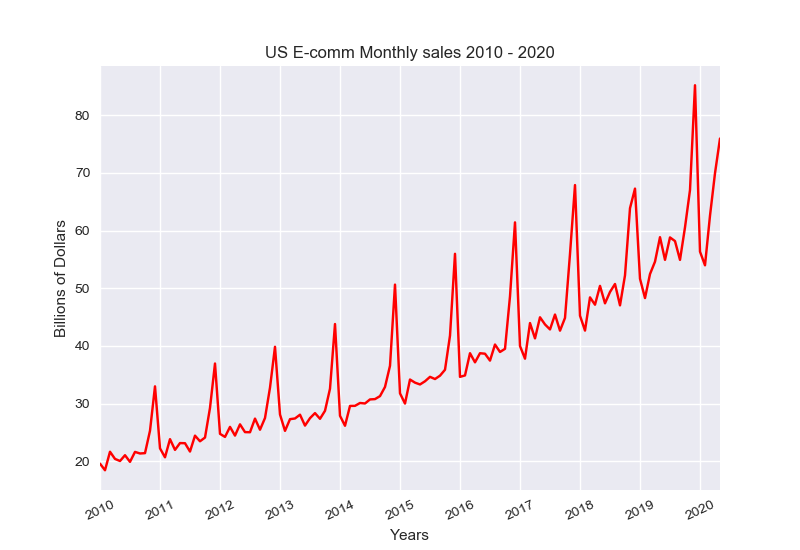

In [3]:
######################################################
#10.1  Line graph Monthly Sales 2010-2020 Ecomm      #
#   - change units from millions to billions.        #
######################################################

line_x = monthly_df.index
line_y = monthly_df["ecomm sales"] / 1000
line_xticks = monthly_df["year"].unique()
line_xlabel = "Years"
line_ylabel = "Billions of Dollars"
line_title = "US E-comm Monthly sales 2010 - 2020"

plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y,color="r")
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_x[::12], line_xticks, rotation=25)

plt.show()
plt.savefig("Data/USCensus_ecomm_tenyear_monthly_sales.png")

<IPython.core.display.Javascript object>


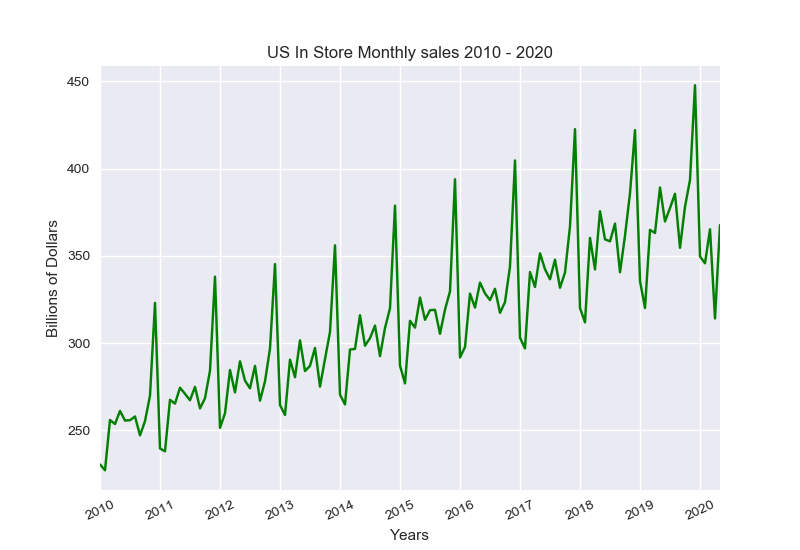

In [4]:
######################################################
#10.2  Line graph Monthly Sales 2010-2020 In Store   #
#   - change units from millions to billions.        #
######################################################

line_x = monthly_df.index
line_y = monthly_df["instore sales"] / 1000
line_xticks = monthly_df["year"].unique()
line_xlabel = "Years"
line_ylabel = "Billions of Dollars"
line_title = "US In Store Monthly sales 2010 - 2020"

plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y,color="g")
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_x[::12], line_xticks, rotation=25)

plt.show()
plt.savefig("Data/USCensus_instore_tenyear_monthly_sales.png")

<IPython.core.display.Javascript object>


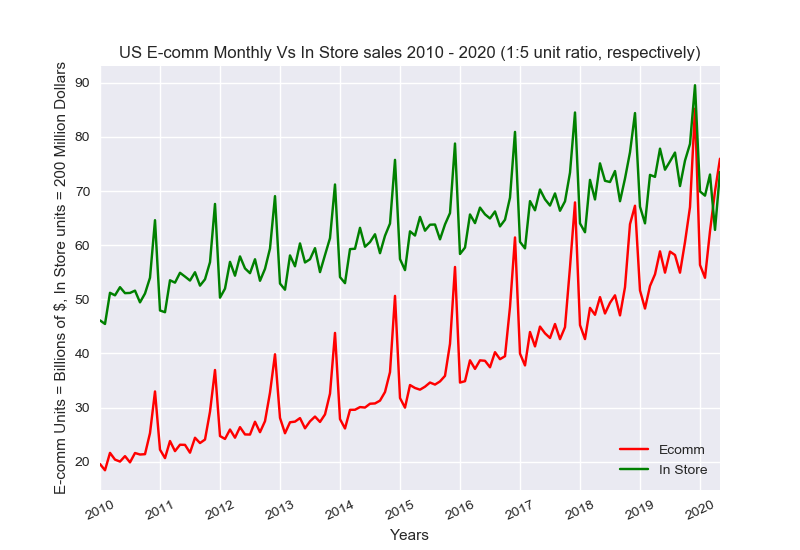

In [5]:
######################################################
#10.3  Line graph Monthly Sales 2010-2020            #
#   - overlay ecomm and instore (at 20%) sales.      #
######################################################

line_x = monthly_df.index
line_y = monthly_df["ecomm sales"] / 1000
line_xticks = monthly_df["year"].unique()
line_xlabel = "Years"
line_ylabel = "E-comm Units = Billions of $, In Store units = 200 Million Dollars"
line_title = "US E-comm Monthly Vs In Store sales 2010 - 2020 (1:5 unit ratio, respectively)"

plt.style.use("seaborn")
plt.figure()
ecomm103, = plt.plot(line_x, line_y,color="r", label = "Ecomm")
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_x[::12], line_xticks, rotation=25)

plt.show()


line_x = monthly_df.index
line_y = monthly_df["instore sales"] / 5000    #  units now in 200M$

plt.style.use("seaborn")
comm103, = plt.plot(line_x, line_y,color="g", label="In Store")
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_x[::12], line_xticks, rotation=25)

plt.legend(loc="lower right")

plt.show()
plt.savefig("Data/USCensus_joint_tenyear_monthly_sales.png")


<IPython.core.display.Javascript object>


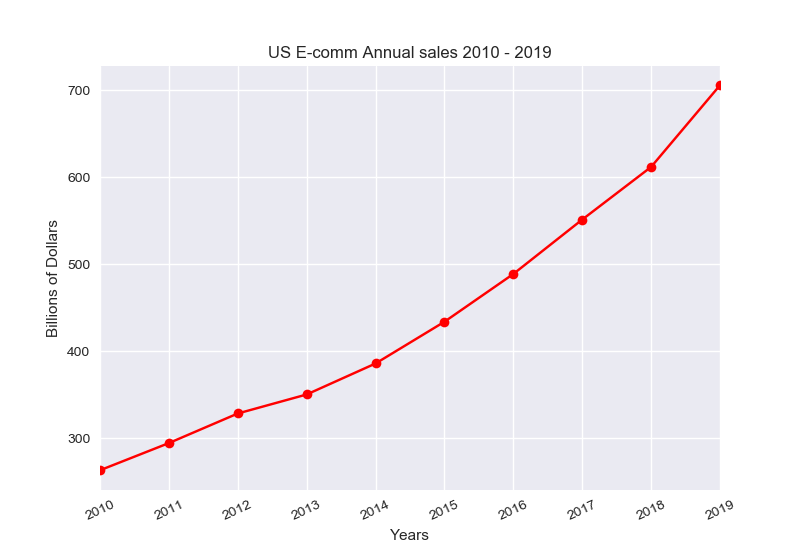

In [6]:
######################################################
#10.4  Line graph Annual Sales 2010-2019 Ecomm       #
#   - change units from millions to billions.        #
######################################################

line_x = annual_10to19["year"]
line_y = annual_10to19["ecomm sales"] / 1000
line_xticks = annual_10to19["year"].unique()
line_ylabel = "Billions of Dollars"
line_xlabel = "Years"
line_title = "US E-comm Annual sales 2010 - 2019"

plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y,color="r", marker ='o')
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(rotation=25)

plt.show()
plt.savefig("Data/USCensus_ecomm_tenyear_annual_sales.png")

<IPython.core.display.Javascript object>


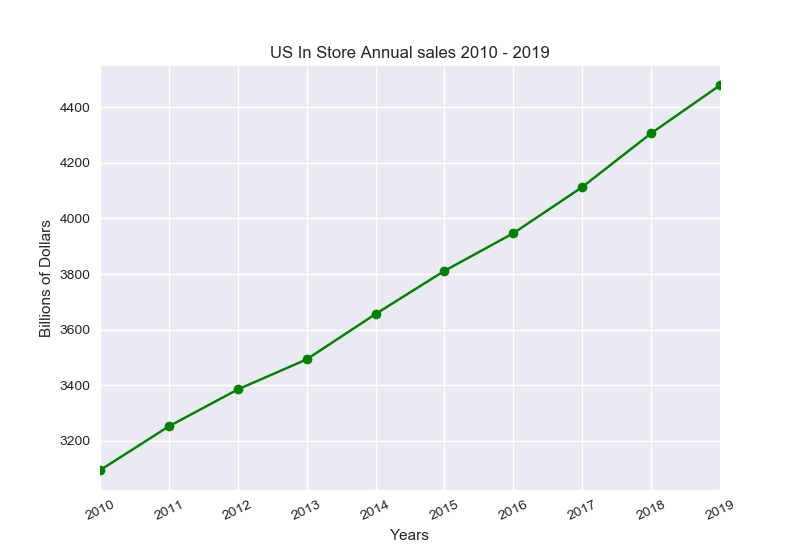

In [7]:
#####################################################
#10.5  Line graph Annual Sales 2010-2019 In Store   #
#   - change units from millions to billions.       #
#####################################################

line_x = annual_10to19["year"]
line_y = annual_10to19["instore sales"] / 1000
line_xticks = annual_10to19["year"].unique()
line_xlabel = "Years"
line_ylabel = "Billions of Dollars"
line_title = "US In Store Annual sales 2010 - 2019"

plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y,color="g", marker="o")
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(rotation=25)

plt.show()
plt.savefig("Data/USCensus_instore_tenyear_annual_sales.png")

####  Section 20:   Monthly Percent Change graphing for Ecomm and In Store   ###

<IPython.core.display.Javascript object>


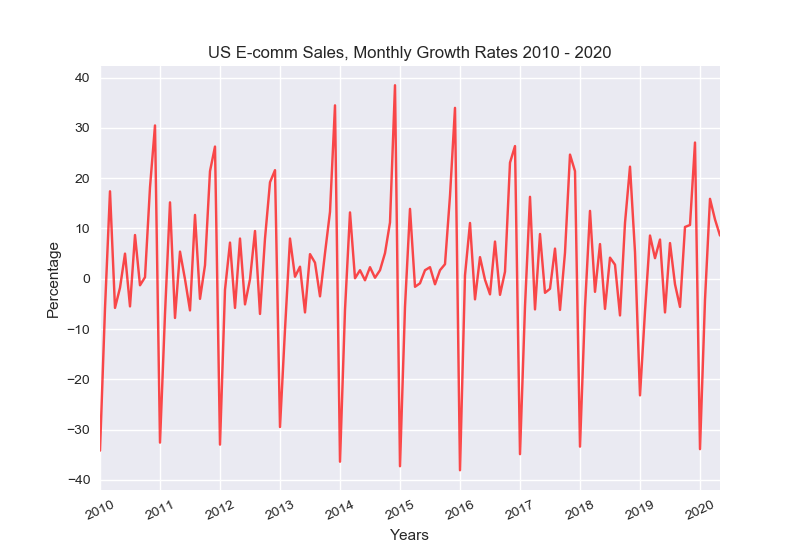

In [8]:
##############################################################
#20.1  line Graph  perchange Ten Year Monthly ecomm          #
##############################################################

line_x = ecomm_perchange.index
line_y = ecomm_perchange["amount"]
line_xticks = ecomm_perchange["year"].unique()
line_xlabel = "Years"
line_ylabel = "Percentage"
line_title = "US E-comm Sales, Monthly Growth Rates 2010 - 2020"
plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y,color="red",alpha=.7)

plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_x[::12], line_xticks, rotation=25)

plt.show()
plt.savefig("Data/USCensus_ecomm_tenyear_monthly_growth.png")

<IPython.core.display.Javascript object>


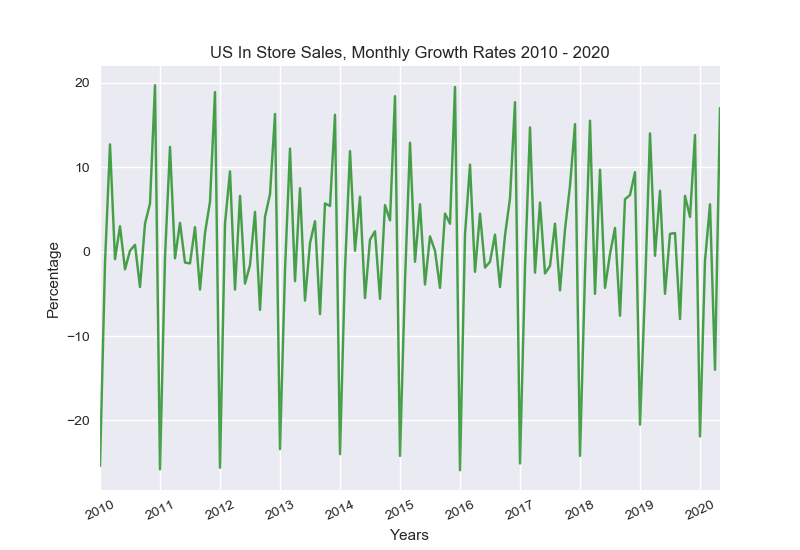

In [9]:
##############################################################
#20.2  line Graph  perchange Ten Year Monthly InStore        #
##############################################################

line_x = comm_perchange.index
line_y = comm_perchange["amount"]
line_xticks = comm_perchange["year"].unique()
line_xlabel = "Years"
line_ylabel = "Percentage"
line_title = "US In Store Sales, Monthly Growth Rates 2010 - 2020"
plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y,color="g",alpha=.7)

plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_x[::12], line_xticks, rotation=25)

plt.show()
plt.savefig("Data/USCensus_instore_tenyear_monthly_growth.png")

<IPython.core.display.Javascript object>


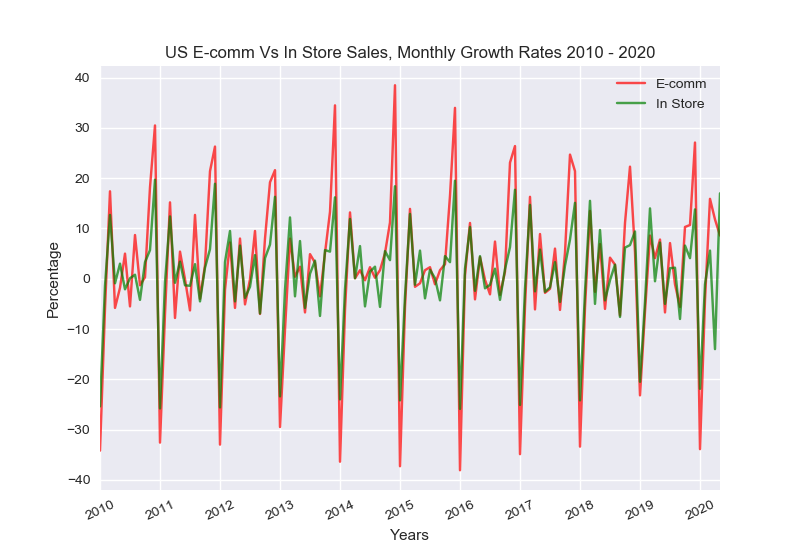

In [10]:
#################################################################
#20.3  line Graph  perchange Ten Year Monthly ecomm & Instore   #
#################################################################

line_xe = ecomm_perchange.index
line_ye = ecomm_perchange["amount"]
line_xticks = ecomm_perchange["year"].unique()
line_ylabel = "Percentage"
line_xlabel = "Years"
line_title = "US E-comm Vs In Store Sales, Monthly Growth Rates 2010 - 2020"
plt.style.use("seaborn")
plt.figure()
ecom203, = plt.plot(line_xe, line_ye,color="r",alpha=.7, label = "E-comm")

plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_xe[::12], line_xticks, rotation=25)

plt.show()

line_xc = comm_perchange.index
line_yc = comm_perchange["amount"]
com203, = plt.plot(line_xc, line_yc,color="g",alpha=.7,label="In Store")
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_xc[::12], line_xticks, rotation=25)
plt.legend(loc="upper right")


plt.savefig("Data/USCensus_joint_tenyear_monthly_growth.png")

####  Section 30:   Ecomm Percentage of Total Retail   graphing   ###

<IPython.core.display.Javascript object>


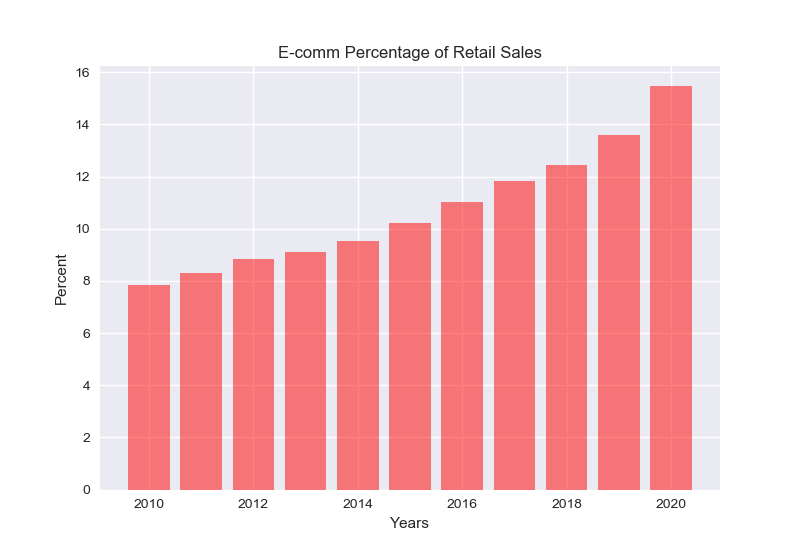

In [11]:
##############################################################
#30.1   bar graph percentage of Annual Ecomm Sales 2010-20   #
##############################################################

xaxis = annual_df["year"]
yaxis = annual_df["ecomm %"]
plt.figure()
plt.title("E-comm Percentage of Retail Sales")
plt.xlabel("Years")
plt.ylabel("Percent")

plt.bar(xaxis, yaxis, alpha=0.5, align="center",color=("r"))
plt.show()
plt.savefig("Data/USCensus_ecomm_tenyear_percentage.png")

<IPython.core.display.Javascript object>


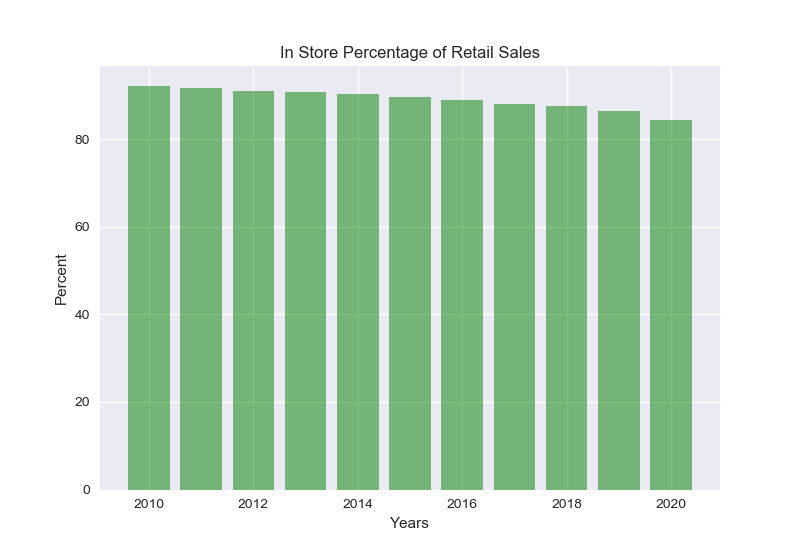

In [12]:
################################################################
#30.2   bar graph percentage of Annual InStore Sales 2010-20   #
################################################################

inper = round((annual_df["instore sales"] / annual_df["total sales"]) * 100,2)

xaxis = annual_df["year"]
yaxis = inper
plt.figure()
plt.title("In Store Percentage of Retail Sales")
plt.xlabel("Years")
plt.ylabel("Percent")

plt.bar(xaxis, yaxis, alpha=0.5, align="center",color=("g"))
plt.show()
plt.savefig("Data/USCensus_instore_tenyear_percentage.png")

<IPython.core.display.Javascript object>


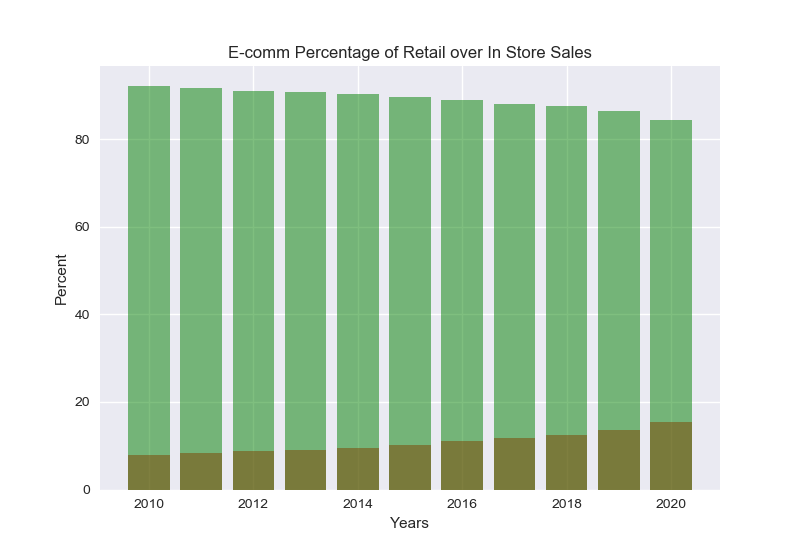

In [13]:
###########################################################################
#30.3   bar graph percentage of Annual Ecomm over InStore Sales 2010-20   #
###########################################################################

xaxise = annual_df["year"]
yaxise = annual_df["ecomm %"]
plt.figure()

plt.bar(xaxise, yaxise, alpha=0.5, align="center",color=("r"))
plt.show()


inper = round((annual_df["instore sales"] / annual_df["total sales"]) * 100,2)
plt.title("E-comm Percentage of Retail over In Store Sales")
plt.xlabel("Years")
plt.ylabel("Percent")

xaxisc = annual_df["year"]
yaxisc = inper
plt.bar(xaxisc, yaxisc, alpha=0.5, align="center",color=("g"),)
plt.show()
plt.savefig("Data/USCensus_ecomm_over_com_tenyear_percentage.png")

####  Section 40:   Show  COVID  Effect graphing   ###

<IPython.core.display.Javascript object>


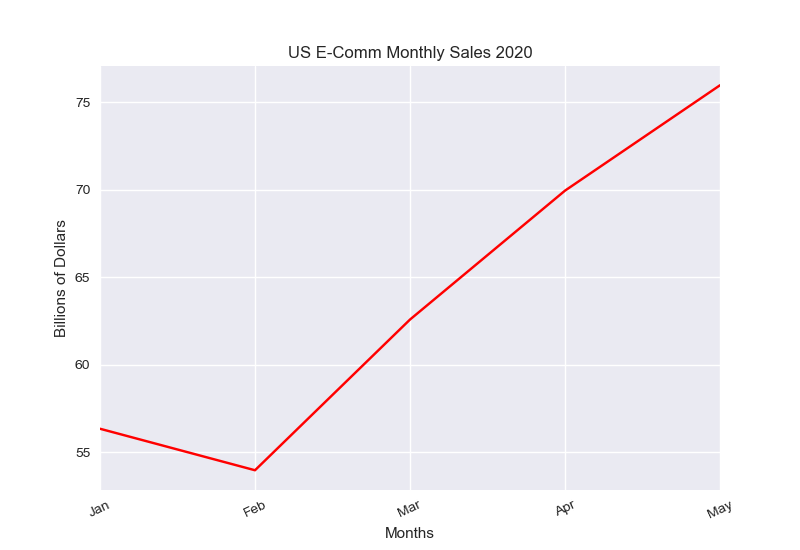

In [14]:
#########################################
#40.1  2020 graph Monthly Ecomm Sales   #
#########################################

line_x = just_20["month"]
line_y = just_20["amount"] / 1000
plt.figure()
line_xlabel = "Months"
line_ylabel = "Billions of Dollars"
line_title = "US E-Comm Monthly Sales 2020"

plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xticks(rotation=25)
plt.style.use("seaborn")
plt.plot(line_x, line_y,color="red")
plt.xlim(line_x[0], line_x[len(line_x)-1])

plt.show()
plt.savefig("Data/USCensus_ecomm_2020_monthly_sales.png")

<IPython.core.display.Javascript object>


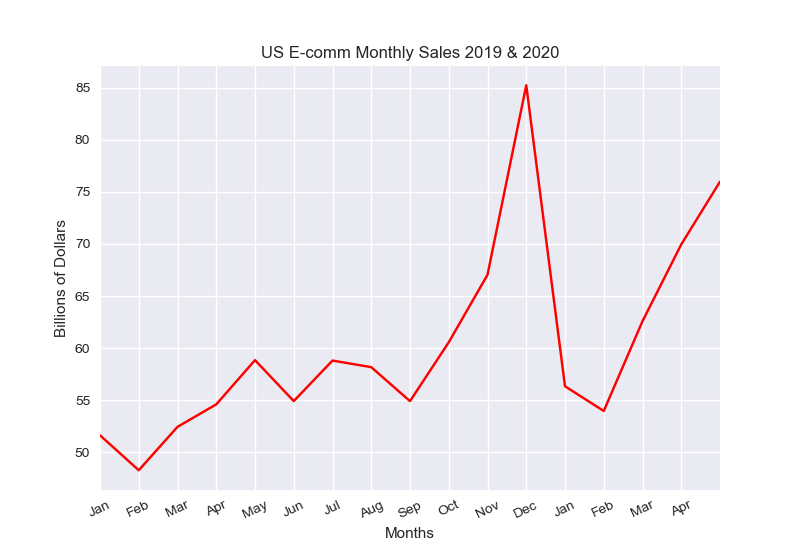

In [15]:
##################################################
#40.2  2019 and 2020  graph Monthly Ecomm Sales  #
##################################################

tickmarks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
ticknames = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar","Apr","May" ]
line_x = sales_19and20.index
line_y = sales_19and20["amount"] / 1000
plt.figure()
line_ylabel = "Billions of Dollars"
line_xlabel = "Months"
line_title = "US E-comm Monthly Sales 2019 & 2020"
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.style.use("seaborn")
plt.plot(line_x, line_y,color="red")
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(tickmarks, ticknames, rotation=25)
plt.show()
plt.savefig("Data/USCensus_ecomm_201920_monthly_sales.png")

<IPython.core.display.Javascript object>


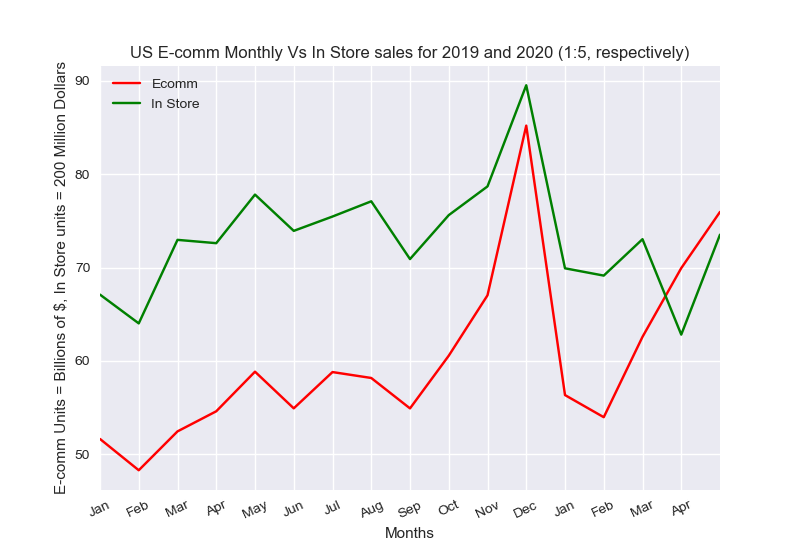

In [16]:
############################################################
#40.2  2019 an 2020  graph Monthly Ecomm Sales Vs Instore  #
############################################################

tickmarks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
ticknames = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar","Apr","May" ]

line_x = sales_19and20.index
line_y = sales_19and20["amount"] / 1000
line_xlabel = "Months"
line_ylabel = "E-comm Units = Billions of $, In Store units = 200 Million Dollars"
line_title = "US E-comm Monthly Vs In Store sales for 2019 and 2020 (1:5, respectively)"

plt.style.use("seaborn")
plt.figure()
ecomm402, = plt.plot(line_x, line_y,color="r", label = "Ecomm")
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(tickmarks, ticknames, rotation=25)
plt.show()

line_x = instore_1920.index
line_y = instore_1920["amount"] / 5000    #  units now in 200M$
comm402, = plt.plot(line_x, line_y,color="g", label="In Store")
plt.legend(loc="upper left")

plt.show()
plt.savefig("Data/USCensus_joint_201920_monthly_sales.png")


<IPython.core.display.Javascript object>


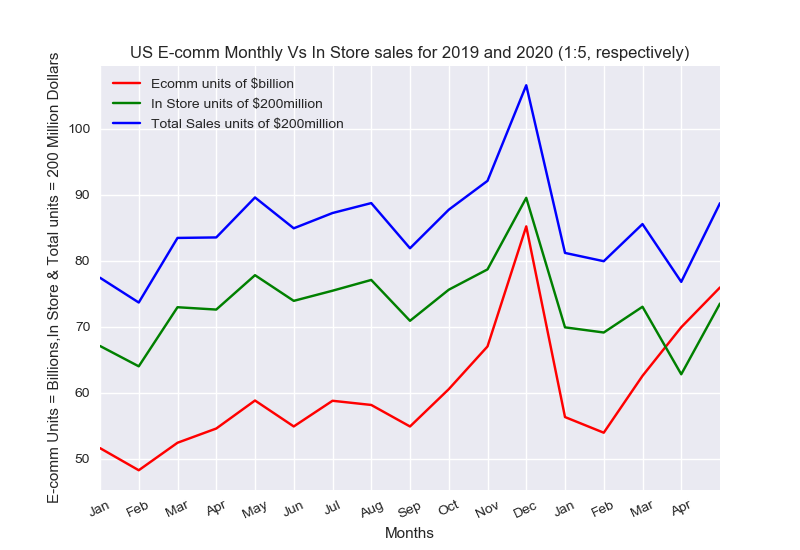

In [17]:
############################################################

tickmarks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
ticknames = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar","Apr","May" ]

line_x = sales_19and20.index
line_y = sales_19and20["amount"] / 1000
line_xlabel = "Months"
line_ylabel = "E-comm Units = Billions,In Store & Total units = 200 Million Dollars"
line_title = "US E-comm Monthly Vs In Store sales for 2019 and 2020 (1:5, respectively)"

plt.style.use("seaborn")
plt.figure()
ecomm402, = plt.plot(line_x, line_y,color="r", label = "Ecomm units of $billion")
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(tickmarks, ticknames, rotation=25)
plt.show()

line_x = instore_1920.index
line_y = instore_1920["amount"] / 5000    #  units now in 200M$
comm402, = plt.plot(line_x, line_y,color="g", label="In Store units of $200million")
plt.legend(loc="upper left")

line_x = instore_1920.index
line_y = (sales_19and20["amount"] +  instore_1920["amount"]) / 5000    #  units now in 200M$
total402, = plt.plot(line_x, line_y,color="b", label="Total Sales units of $200million")
plt.legend(loc="upper left")



plt.show()

<IPython.core.display.Javascript object>


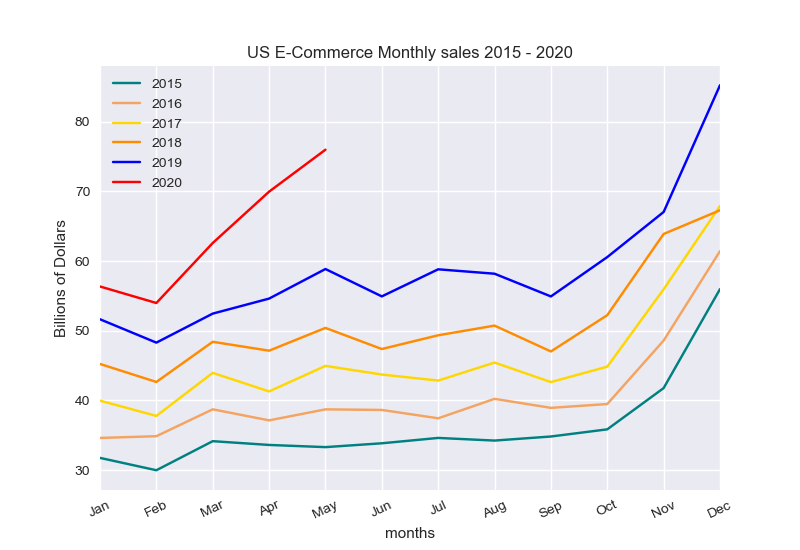

In [18]:
####################
#40.3  Overlay Lines of Monthly Sales
####################################

#2015
line_x5 = just_15["month"]
line_y5 = just_15["amount"] / 1000
plt.figure()
line_xlabel = "months"
line_ylabel = "Billions of Dollars"
line_title = "US E-Commerce Monthly sales 2015 - 2020"
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
ecomm15, = plt.plot(line_x5, line_y5,color="teal",label=2015)

plt.xticks(rotation=25)
plt.style.use("seaborn")
plt.xlim(line_x5[0], line_x5[len(line_x5)-1])


#2016
line_x6 = just_16["month"]
line_y6 = just_16["amount"] / 1000
ecomm16, = plt.plot(line_x6, line_y6,color="sandybrown",label="2016")


#2017
line_x7 = just_17["month"]
line_y7 = just_17["amount"] / 1000
ecomm17, = plt.plot(line_x7, line_y7,color="gold",label="2017")

#2018
line_x8 = just_18["month"]
line_y8 = just_18["amount"] / 1000
ecomm18, = plt.plot(line_x8, line_y8,color="darkorange",label="2018")

#2019
line_x9 = just_19["month"]
line_y9 = just_19["amount"] / 1000
ecomm9, = plt.plot(line_x9, line_y9,color="b",label="2019")

#2020
line_x2 = just_20["month"]
line_y2 = just_20["amount"] / 1000
ecomm20, = plt.plot(line_x2, line_y2,color="r", label="2020")
plt.legend(loc="upper left")

plt.savefig("Data/USCensus_ecomm_monthly_sales_15to20.png")

####  Section 50:   Monthly Trends   ###

In [19]:
#################################################
#50.0 Create df's for showing monthly trends    #
#     -write out summary csv file               #
#################################################

complete_instore_sales = complete_df[(complete_df["dt_code"] == "SM") & (complete_df["cat_code"] == "44W72")]
complete_instore_sales.reset_index(inplace=True, drop=True)
complete_ecomm_sales = complete_df[(complete_df["dt_code"] == "SM") & (complete_df["cat_code"] == "4541")]
complete_ecomm_sales.reset_index(inplace=True, drop=True)

complete_instore_perchange = complete_df[(complete_df["dt_code"] == "MPCSM") & (complete_df["cat_code"] == "44W72")]
complete_instore_perchange.reset_index(inplace=True, drop=True)
complete_ecomm_perchange = complete_df[(complete_df["dt_code"] == "MPCSM") & (complete_df["cat_code"] == "4541")]
complete_ecomm_perchange.reset_index(inplace=True, drop=True)

total_sales = complete_instore_sales["amount"] + complete_ecomm_sales["amount"]

complete_sum = pd.DataFrame({"month": complete_instore_sales["month"], "year": complete_instore_sales["year"], 
                       "totalsales": total_sales, "instoresales": complete_instore_sales["amount"],
                       "ecommsales": complete_ecomm_sales["amount"], "ischng": complete_instore_perchange ["amount"],
                       "ecchng": complete_ecomm_perchange["amount"]})

Jan_sum = complete_sum[complete_sum["month"] == "Jan"]
Feb_sum = complete_sum[complete_sum["month"] == "Feb"]
Mar_sum = complete_sum[complete_sum["month"] == "Mar"]
Apr_sum = complete_sum[complete_sum["month"] == "Apr"]
May_sum = complete_sum[complete_sum["month"] == "May"]
Jun_sum = complete_sum[complete_sum["month"] == "Jun"]
Jul_sum = complete_sum[complete_sum["month"] == "Jul"]
Aug_sum = complete_sum[complete_sum["month"] == "Aug"]
Sep_sum = complete_sum[complete_sum["month"] == "Sep"]
Oct_sum = complete_sum[complete_sum["month"] == "Oct"]
Nov_sum = complete_sum[complete_sum["month"] == "Nov"]
Dec_sum = complete_sum[complete_sum["month"] == "Dec"]

complete_byyear = complete_sum.groupby("year")
total_year = complete_byyear["year"].mean()
total_total = complete_byyear["totalsales"].sum()
total_instore = complete_byyear["instoresales"].sum()
total_ecomm = complete_byyear["ecommsales"].sum()
avgperchange_instore = round(complete_byyear["ischng"].mean(),2)
avgperchange_ecomm = round(complete_byyear["ecchng"].mean(),2)

annual_sum = pd.DataFrame({"year": total_year, "totalsales": total_total, "instoresales": total_instore,
                       "ecomsales": total_ecomm, "ischng": avgperchange_instore, "ecchng": avgperchange_ecomm})

annual_sum_no20 = annual_sum[annual_sum["year"] != 2020]

dfs = [Jan_sum, Feb_sum, Mar_sum, Apr_sum, May_sum, Jun_sum, Jul_sum, Aug_sum, Sep_sum, Oct_sum, Nov_sum, Dec_sum,
       annual_sum, annual_sum_no20]

for x in dfs:
    x.reset_index(inplace=True,drop=True)

complete_df.to_csv("Data/censusdata_complete_sum.csv", index=False, header=True)

<IPython.core.display.Javascript object>


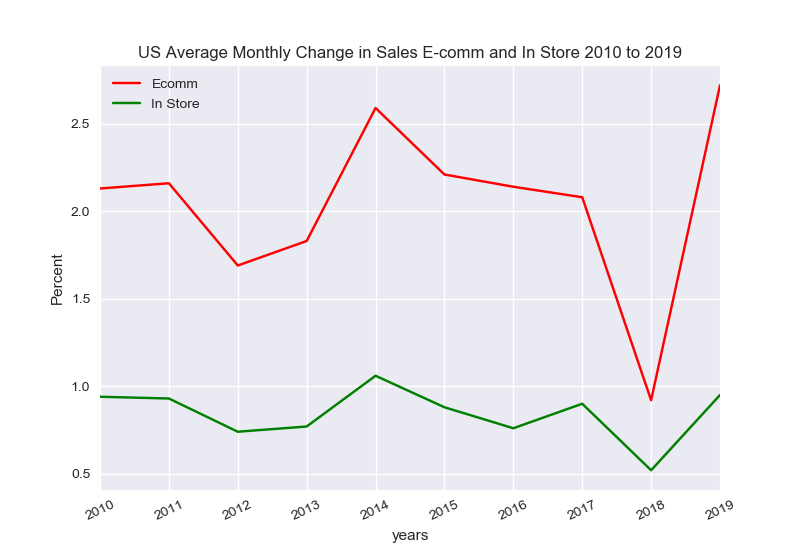

In [20]:
##############################################
#50.1 Avg Monthly Perchange both             #
##############################################

line_x = annual_sum_no20["year"]
line_y = annual_sum_no20["ecchng"] 
line_xlabel = "years"
line_ylabel = "Percent"
line_title = "US Average Monthly Change in Sales E-comm and In Store 2010 to 2019"

plt.style.use("seaborn")
plt.figure()
ecomm501, = plt.plot(line_x, line_y,color="r", label = "Ecomm")
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(rotation=25)
plt.show()

line_x = annual_sum_no20["year"]
line_y = annual_sum_no20["ischng"]
comm501, = plt.plot(line_x, line_y,color="g", label="In Store")
plt.legend(loc="upper left")

plt.show()
plt.savefig("Data/USCensus_monthly_percentage_avg_both.png")

Average monthly change in sales has remained below 1% (save 2014 at 1.06%) for in store retail sales over the past 10 years. In comparison, E-comm sales have mostly been above 2%.  On average, over the past 10 years, in store sales have increased by 0.85% a month and E-comm sales by 2.5% a month.

<IPython.core.display.Javascript object>


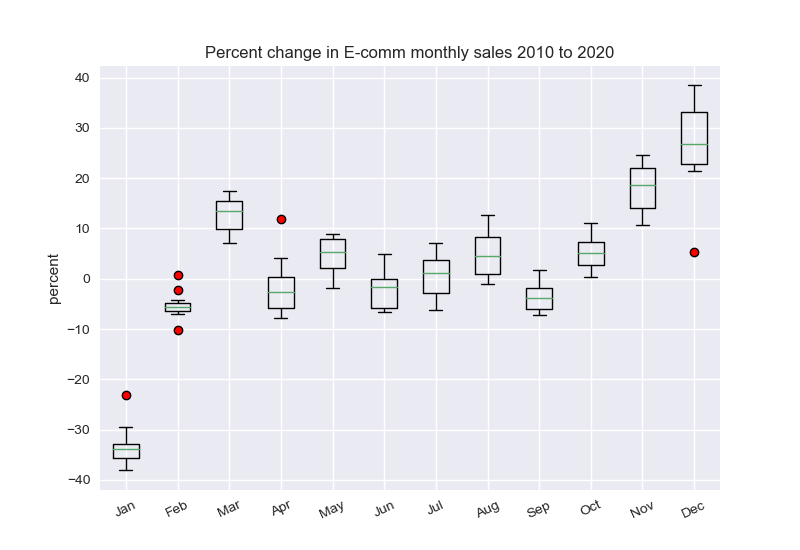

In [21]:
#############################################################
#50.2  boxplot perchange within each month, 10 yrs, ecomm   #
#############################################################
Jan_ecper = round(Jan_sum["ecchng"],2)
Feb_ecper = round(Feb_sum["ecchng"],2)
Mar_ecper = round(Mar_sum["ecchng"],2)
Apr_ecper = round(Apr_sum["ecchng"],2)
May_ecper = round(May_sum["ecchng"],2)
Jun_ecper = round(Jun_sum["ecchng"],2)
Jul_ecper = round(Jul_sum["ecchng"],2)
Aug_ecper = round(Aug_sum["ecchng"],2)
Sep_ecper = round(Sep_sum["ecchng"],2)
Oct_ecper = round(Oct_sum["ecchng"],2)
Nov_ecper = round(Nov_sum["ecchng"],2)
Dec_ecper = round(Dec_sum["ecchng"],2)

months=["Jan","Feb","Mar","Apr", "May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
outlies = dict(markerfacecolor='r', marker='o')
fig1, ax1 = plt.subplots()
ax1.set_title('Percent change in E-comm monthly sales 2010 to 2020')
ax1.set_ylabel("percent")
ax1.set_xticklabels(months)
ax1.boxplot([Jan_ecper,Feb_ecper,Mar_ecper,Apr_ecper,May_ecper,Jun_ecper,Jul_ecper,Aug_ecper,
             Sep_ecper,Oct_ecper,Nov_ecper,Dec_ecper],flierprops=outlies)
plt.xticks(rotation=25)
plt.show()
plt.savefig("Data/USCensus_monthly_percentage_10yr_box_ecomm.png")

<IPython.core.display.Javascript object>


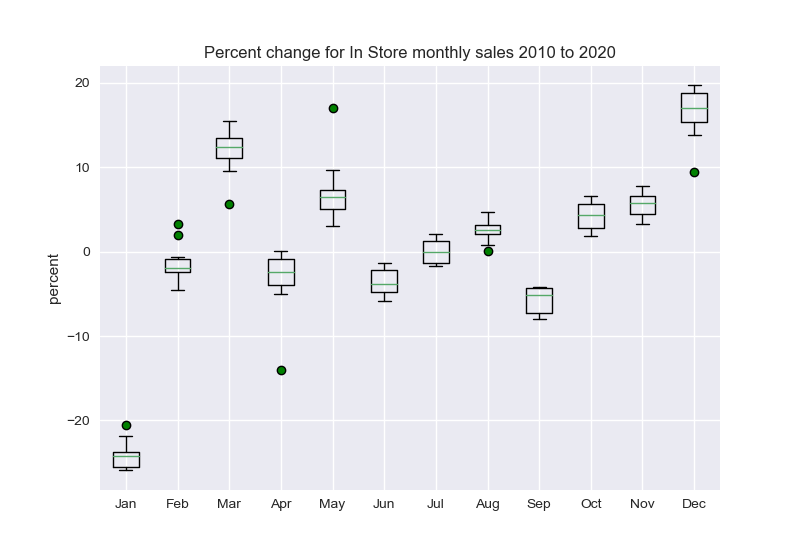

In [22]:
##############################################################
#50.3  boxplot perchange within each month, 10 yrs, instore  #
##############################################################

Jan_isper = round(Jan_sum["ischng"],2)
Feb_isper = round(Feb_sum["ischng"],2)
Mar_isper = round(Mar_sum["ischng"],2)
Apr_isper = round(Apr_sum["ischng"],2)
May_isper = round(May_sum["ischng"],2)
Jun_isper = round(Jun_sum["ischng"],2)
Jul_isper = round(Jul_sum["ischng"],2)
Aug_isper = round(Aug_sum["ischng"],2)
Sep_isper = round(Sep_sum["ischng"],2)
Oct_isper = round(Oct_sum["ischng"],2)
Nov_isper = round(Nov_sum["ischng"],2)
Dec_isper = round(Dec_sum["ischng"],2)


months=["Jan","Feb","Mar","Apr", "May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
outlies = dict(markerfacecolor='g', marker='o')
fig1, ax2 = plt.subplots()
ax2.set_title('Percent change for In Store monthly sales 2010 to 2020')
ax2.set_ylabel("percent")
ax2.set_xticklabels(months)
ax2.boxplot([Jan_isper,Feb_isper,Mar_isper,Apr_isper,May_isper,Jun_isper,Jul_isper,Aug_isper,
             Sep_isper,Oct_isper,Nov_isper,Dec_isper],flierprops=outlies)
plt.show()
plt.savefig("Data/USCensus_monthly_percentage_10yr_box_comm.png")

<IPython.core.display.Javascript object>


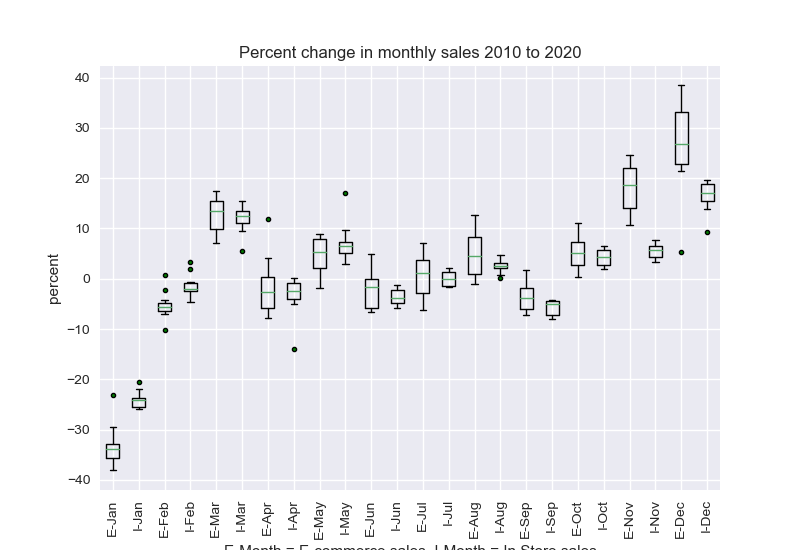

In [23]:
#############################################################################
#50.4  boxplot perchange within each month, 10 yrs, ecomm next to instore   #
#############################################################################
Jan_ecper = round(Jan_sum["ecchng"],2)
Feb_ecper = round(Feb_sum["ecchng"],2)
Mar_ecper = round(Mar_sum["ecchng"],2)
Apr_ecper = round(Apr_sum["ecchng"],2)
May_ecper = round(May_sum["ecchng"],2)
Jun_ecper = round(Jun_sum["ecchng"],2)
Jul_ecper = round(Jul_sum["ecchng"],2)
Aug_ecper = round(Aug_sum["ecchng"],2)
Sep_ecper = round(Sep_sum["ecchng"],2)
Oct_ecper = round(Oct_sum["ecchng"],2)
Nov_ecper = round(Nov_sum["ecchng"],2)
Dec_ecper = round(Dec_sum["ecchng"],2)
Jan_isper = round(Jan_sum["ischng"],2)
Feb_isper = round(Feb_sum["ischng"],2)
Mar_isper = round(Mar_sum["ischng"],2)
Apr_isper = round(Apr_sum["ischng"],2)
May_isper = round(May_sum["ischng"],2)
Jun_isper = round(Jun_sum["ischng"],2)
Jul_isper = round(Jul_sum["ischng"],2)
Aug_isper = round(Aug_sum["ischng"],2)
Sep_isper = round(Sep_sum["ischng"],2)
Oct_isper = round(Oct_sum["ischng"],2)
Nov_isper = round(Nov_sum["ischng"],2)
Dec_isper = round(Dec_sum["ischng"],2)

months=["E-Jan", "I-Jan", "E-Feb", "I-Feb", "E-Mar", "I-Mar", "E-Apr", "I-Apr", "E-May", "I-May", "E-Jun", "I-Jun",
        "E-Jul", "I-Jul", "E-Aug", "I-Aug", "E-Sep", "I-Sep", "E-Oct", "I-Oct", "E-Nov", "I-Nov", "E-Dec", "I-Dec"]

outlies = dict(markerfacecolor='g', marker='o',MS="3")

fig1, ax1 = plt.subplots()
ax1.set_title('Percent change in monthly sales 2010 to 2020')
ax1.set_ylabel("percent")
ax1.set_xlabel("E-Month = E-commerce sales, I-Month = In Store sales")
ax1.set_xticklabels(months)
plt.style.use("seaborn")
ax1.boxplot([Jan_ecper, Jan_isper, Feb_ecper, Feb_isper, Mar_ecper, Mar_isper, Apr_ecper, Apr_isper, May_ecper,
             May_isper, Jun_ecper, Jun_isper, Jul_ecper, Jul_isper, Aug_ecper, Aug_isper, Sep_ecper, Sep_isper,
             Oct_ecper, Oct_isper, Nov_ecper, Nov_isper, Dec_ecper, Dec_isper],flierprops=outlies)
plt.xticks(rotation=90)

plt.show()
plt.savefig("Data/USCensus_monthly_percentage_tenyear_box_both.png")